In [1]:
#importing the required libraries:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#importing the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
#checking the type of file
type(df)

pandas.core.frame.DataFrame

In [4]:
#checking the columns present
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.all()

rank              True
discipline        True
yrs.since.phd     True
yrs.service      False
sex               True
salary            True
dtype: bool

In [6]:
#checking the statistical value
df.isnull().sum()

#every column does not have null values

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

# Scatterplot:

<AxesSubplot:xlabel='rank', ylabel='salary'>

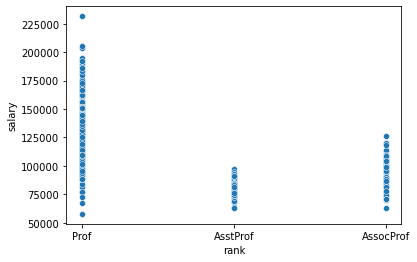

In [7]:
#Exploring the data 

#1st we use Scatter plot
sns.scatterplot(x="rank",y="salary",data=df)

<AxesSubplot:xlabel='discipline', ylabel='salary'>

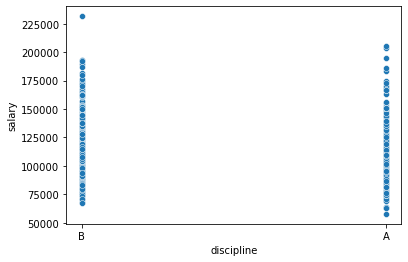

In [8]:
sns.scatterplot(x="discipline",y="salary",data=df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

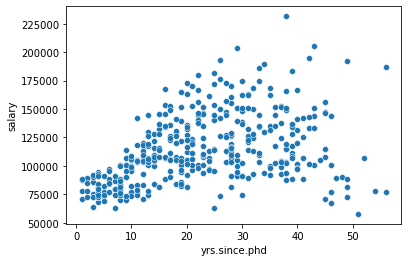

In [9]:
sns.scatterplot(x="yrs.since.phd",y="salary",data=df)

<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

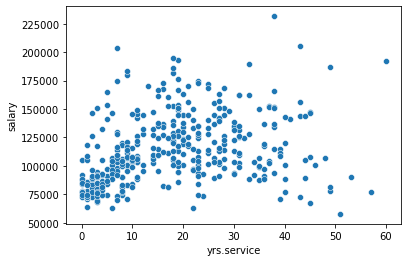

In [10]:
sns.scatterplot(x="yrs.service",y="salary",data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

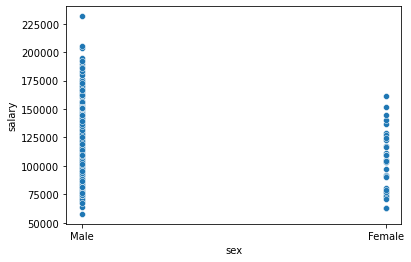

In [11]:
sns.scatterplot(x="sex",y="salary",data=df)

# Correlation:

In [12]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [13]:
#sorting values in ascending order
df.corr()['salary'].sort_values()

yrs.service      0.334745
yrs.since.phd    0.419231
salary           1.000000
Name: salary, dtype: float64

# Correlation using heatmap:

<AxesSubplot:>

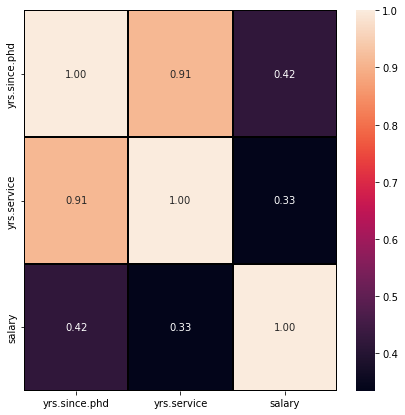

In [14]:
#Using heatmap to easily view large data
import matplotlib.pyplot as plt
#setting the size of the plot to be displayed
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor="black",fmt='.2f')

# Outcome of Correlation:

All the columns of the datasets is positively correlated with the target column.

1.yrs.since.phd has 42 percent correlation with the target column which can be considered as a good bond and has maximum correlation. 2.yrs.service has 33 percent correlation with the target column which can be considered as a good bond and has the minimum correlation.

# Describing the Datasets:

In [15]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


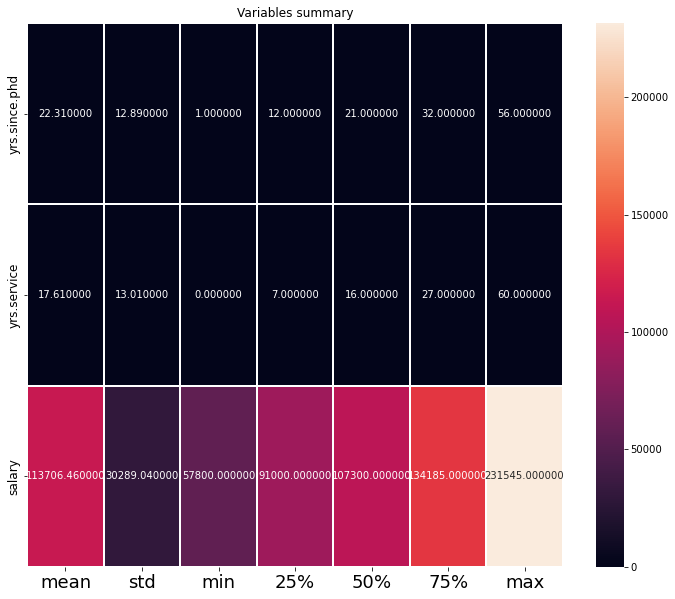

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

# Outcome of describe of Datasets:

From the above plotting we are determining mean, standard deviation, minimum and maximum value of each column.

Total number of rows and & columns in the datasets: 397 rows 6 columns

yrs.since.phd

1.Mean=22.310000 2.std=12.890000 3.min_value=1.000000 4.max_value=56.000000

yrs.service

1.Mean=17.610000 2.std=13.010000 3.min_value=0.000000 4.max_value=60.000000

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


# Checking Outliers:

In [18]:
#using boxplot
import warnings
warnings.filterwarnings('ignore')

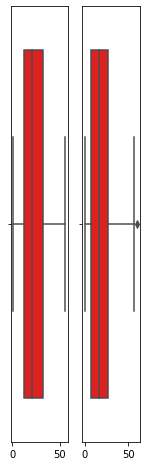

In [19]:
#plotting each individual columns

collist=['yrs.since.phd','yrs.service']
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]].values,color='red')
    plt.tight_layout()

# Skewness:

In [21]:
#checking the skewness of the dataset
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

# Normal Distribution Curve:

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

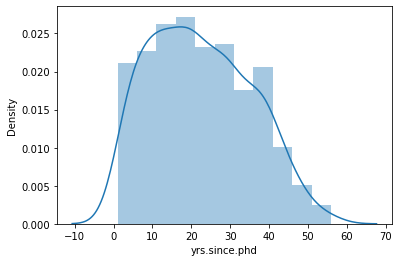

In [22]:
sns.distplot(df["yrs.since.phd"])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

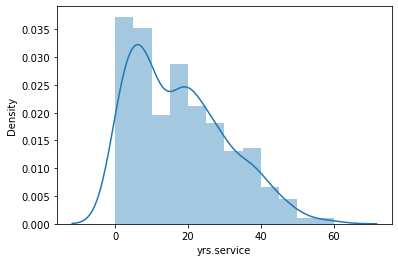

In [23]:
sns.distplot(df["yrs.service"])

# Data Cleaning:

In [24]:
df.corr()['salary']

yrs.since.phd    0.419231
yrs.service      0.334745
salary           1.000000
Name: salary, dtype: float64

# Removing Outliers:

In [25]:
print(df.corr().dtypes)

yrs.since.phd    float64
yrs.service      float64
salary           float64
dtype: object


In [26]:
df['yrs.since.phd']=df['yrs.since.phd'].astype(int)

In [27]:
df['yrs.service']=df['yrs.service'].astype(int)

In [28]:
df['salary']=df['yrs.service'] - df['yrs.since.phd']

In [29]:
print(df)

         rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male      -1
1        Prof          B             20           16  Male      -4
2    AsstProf          B              4            3  Male      -1
3        Prof          B             45           39  Male      -6
4        Prof          B             40           41  Male       1
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male      -3
393      Prof          A             31           19  Male     -12
394      Prof          A             42           25  Male     -17
395      Prof          A             25           15  Male     -10
396  AsstProf          A              8            4  Male      -4

[397 rows x 6 columns]


# Using Z-Score Technique

In [30]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df['salary']))
z.shape

(397,)

In [31]:
(397,)
threshold=3
print(np.where(z<3))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [32]:
len(np.where(z>3)[0])

5

In [33]:
z.iloc[2]

0.6730511090748345

In [34]:
df_new=df[(z<1)]
print("Old Dataframe",df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows",df.shape[0] - df_new.shape[0])

Old Dataframe (397, 6)
New Dataframe (320, 6)
total_dropped_rows 77


# Percentage Data Loss:

In [35]:
loss_percent=(768-716)/768*100
print(loss_percent,'%')

6.770833333333333 %


checking wheather how much outliers are there. if outliers there help in testing the model.

# Model without outliers is df and model with desired outliers id df_new1:

dividing data in features vectors:

In [36]:
#independent column
x=df_new.iloc[:,:-1]
#target
y=df_new.iloc[:,-1]
print(x)
print(y)

          rank discipline  yrs.since.phd  yrs.service   sex
0         Prof          B             19           18  Male
1         Prof          B             20           16  Male
2     AsstProf          B              4            3  Male
3         Prof          B             45           39  Male
5    AssocProf          B              6            6  Male
..         ...        ...            ...          ...   ...
386       Prof          A             29           27  Male
388       Prof          A             38           36  Male
392       Prof          A             33           30  Male
395       Prof          A             25           15  Male
396   AsstProf          A              8            4  Male

[320 rows x 5 columns]
0      -1
1      -4
2      -1
3      -6
5       0
       ..
386    -2
388    -2
392    -3
395   -10
396    -4
Name: salary, Length: 320, dtype: int32


# Transforming data to remove skewness:

In [37]:
from sklearn.preprocessing import power_transform
x=[[-1.31616039, -0.70710678],[0.20998268, -0.70710678],[1.1061777, 1.41421356]]
n=print(power_transform(x,method='yeo-johnson'))
n

[[-1.25281802 -0.70710678]
 [ 0.05822308 -0.70710678]
 [ 1.19459494  1.41421356]]


In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.31616039, -0.70710678],
       [ 0.20998268, -0.70710678],
       [ 1.1061777 ,  1.41421356]])